# 11_Simple-MLP-supervised-SBATCH

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import MLPSupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

## Quick test

`sbatch sbatch_scripts/11_no-prune_fast.sh` Job 55637925

`sbatch sbatch_scripts/11_prune_fast.sh ` 55640983

**Updated model script for initialization**
```
$ sbatch sbatch_scripts/11_prune_fast.sh 
Submitted batch job 56479854
$ sbatch sbatch_scripts/11_no-prune_fast.sh 
Submitted batch job 56478616
```

In [8]:
total_size = (28*28 * 16) + (16 * 10)
total_size

12704

In [29]:
no_prune_fast_result = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/no_prune_fast/sbatch-56478616_bs-32_sf-0.05_vr-6_id-0.5_nti-100_ugpp-False_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

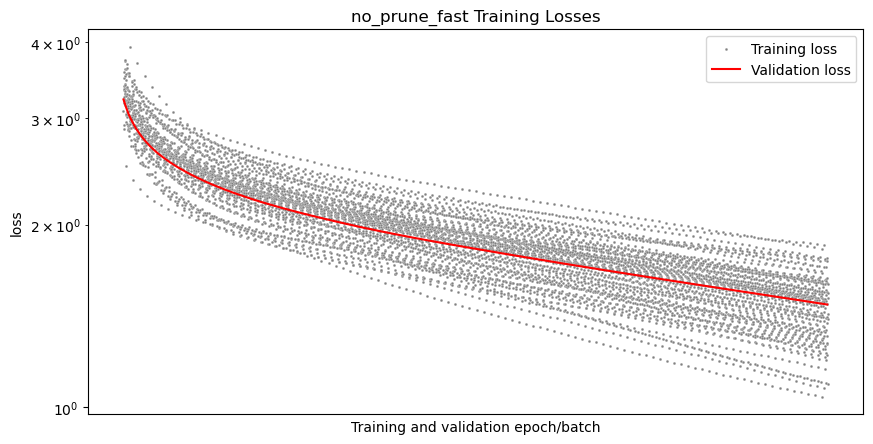

In [25]:
no_prune_fast_result.plot_training_losses()

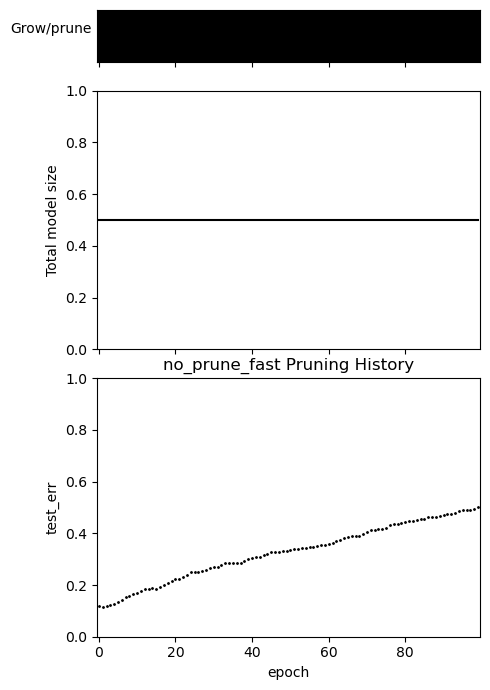

In [26]:
fig, ax = no_prune_fast_result.plot_pruning(figsize=(5, 7), norm_size=total_size)

In [30]:
no_prune_fast_result.model_attr["synapse_count_history"]

[6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0,
 6352.0]

In [35]:
prune_fast_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/prune_fast/sbatch-56479854_bs-32_sf-0.05_vr-6_id-0.5_nti-100_ugpp-True_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'prune_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

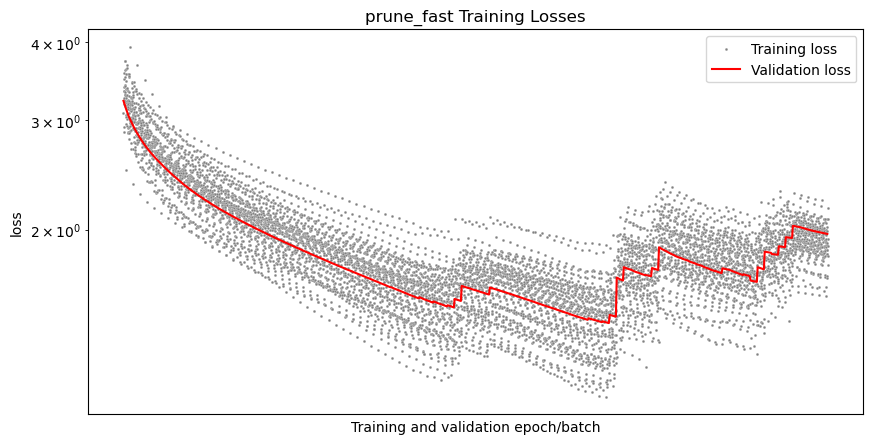

In [36]:
prune_fast_results.plot_training_losses()

In [37]:
prune_fast_results.model_attr['synapse_count_history']

[6352.0,
 6988.0,
 7561.0,
 8076.0,
 8540.0,
 8958.0,
 9334.0,
 9671.0,
 9975.0,
 10249.0,
 9223.0,
 9572.0,
 9886.0,
 10169.0,
 10423.0,
 10652.0,
 10858.0,
 11043.0,
 11210.0,
 11360.0,
 11495.0,
 10345.0,
 10582.0,
 10795.0,
 10987.0,
 11159.0,
 10042.0,
 10310.0,
 10550.0,
 10766.0,
 10961.0,
 11136.0,
 10021.0,
 10291.0,
 10533.0,
 10751.0,
 10948.0,
 11124.0,
 10011.0,
 10282.0,
 9253.0,
 9599.0,
 8638.0,
 9045.0,
 8140.0,
 8597.0,
 7737.0,
 6963.0,
 6266.0,
 6910.0,
 7491.0,
 6741.0,
 6066.0,
 6731.0,
 7329.0,
 7867.0,
 8351.0,
 7515.0,
 8035.0,
 8503.0,
 7652.0,
 8158.0,
 8614.0,
 9024.0,
 8121.0,
 7308.0,
 6576.0,
 7190.0,
 6470.0,
 5822.0,
 5239.0,
 4714.0,
 5514.0,
 4962.0,
 4464.0,
 4017.0,
 3615.0,
 4525.0,
 4072.0,
 3664.0,
 4569.0,
 4111.0,
 4971.0,
 4473.0,
 4025.0,
 3622.0,
 4531.0,
 4077.0,
 3669.0,
 3301.0,
 2970.0,
 2672.0,
 2403.0,
 2162.0,
 1945.0,
 1749.0,
 2846.0,
 2560.0,
 2303.0,
 2072.0,
 1864.0]

In [38]:
6352.0 * 2

12704.0

In [39]:
total_size

12704

In [40]:
6352.0 + 628 + 80

7060.0

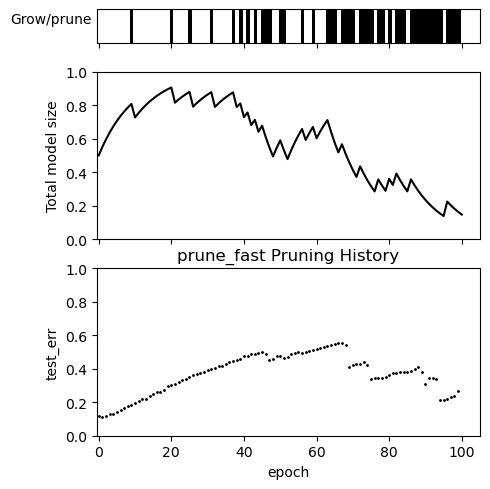

In [41]:
fig, axes = prune_fast_results.plot_pruning(norm_size=total_size)

# Full runs

500 epochs, 10% of MNIST

```
sbatch sbatch_scripts/11_no-prune_full.sh 
Submitted batch job 55642494

sbatch sbatch_scripts/11_prune_full.sh 
Submitted batch job 55642524
```

In [4]:
no_prune_full_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/no_prune_full/sbatch-55642494_bs-32_sf-0.1_vr-6_id-0.5_nti-500_ugpp-False_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_full Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

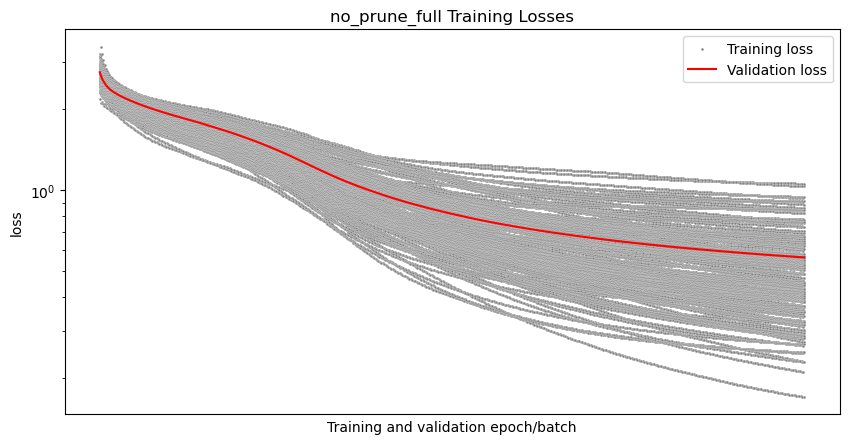

In [5]:
no_prune_full_results.plot_training_losses()

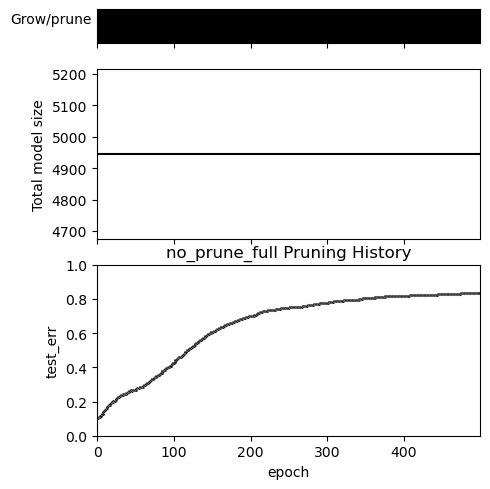

In [26]:
fig, ax = no_prune_full_results.plot_pruning()

In [12]:
prune_full_results = MLPSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/11/prune_full/sbatch-55642524_bs-32_sf-0.1_vr-6_id-0.5_nti-500_ugpp-True_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'prune_full Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

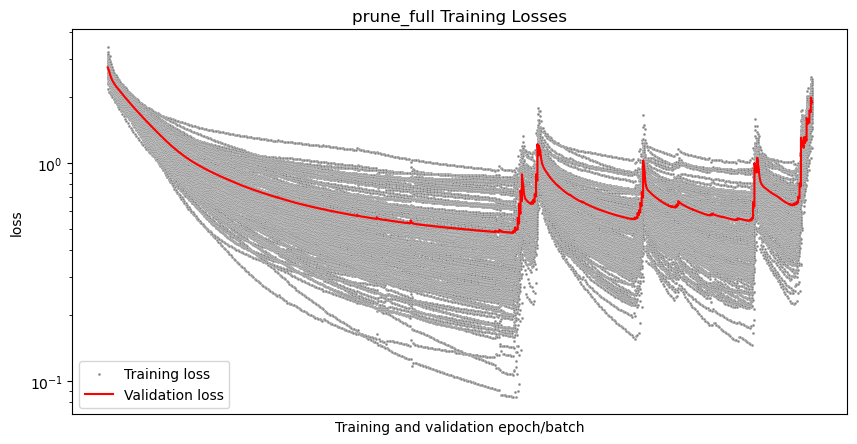

In [13]:
prune_full_results.plot_training_losses()

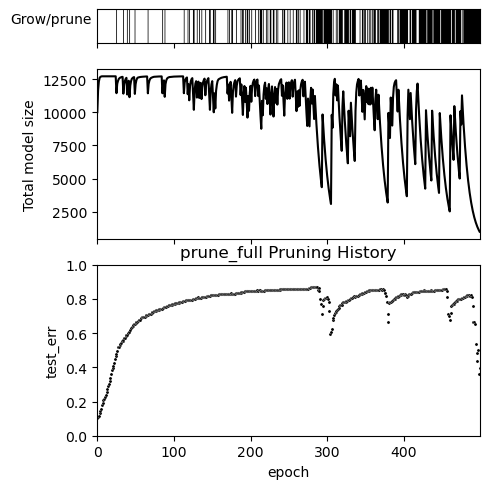

In [25]:
fig, ax = prune_full_results.plot_pruning()